In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from tabulate import tabulate
from sklearn.ensemble import GradientBoostingRegressor


In [ ]:
# Load dataset
df = pd.read_csv("player_rating_data_set.csv")

# Data understanding

In [ ]:
# Display the first few rows of the dataset
df.head()

# Get a summary of the dataset, including the number of non-null entries
df.shape




(16160, 57)

In [ ]:
# Display a table showing column names and their data types
column_info = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes.values
})

# Show only the first 50-60 columns for readability
column_info.head(60)


,Column Name,Data Type
0,Colonne 1,int64
1,Unnamed: 0,int64
2,Rank,int64
3,Name,object
4,OVR,int64
5,PAC,int64
6,SHO,int64
7,PAS,int64
8,DRI,int64
9,DEF,int64


**Data distribution**

---



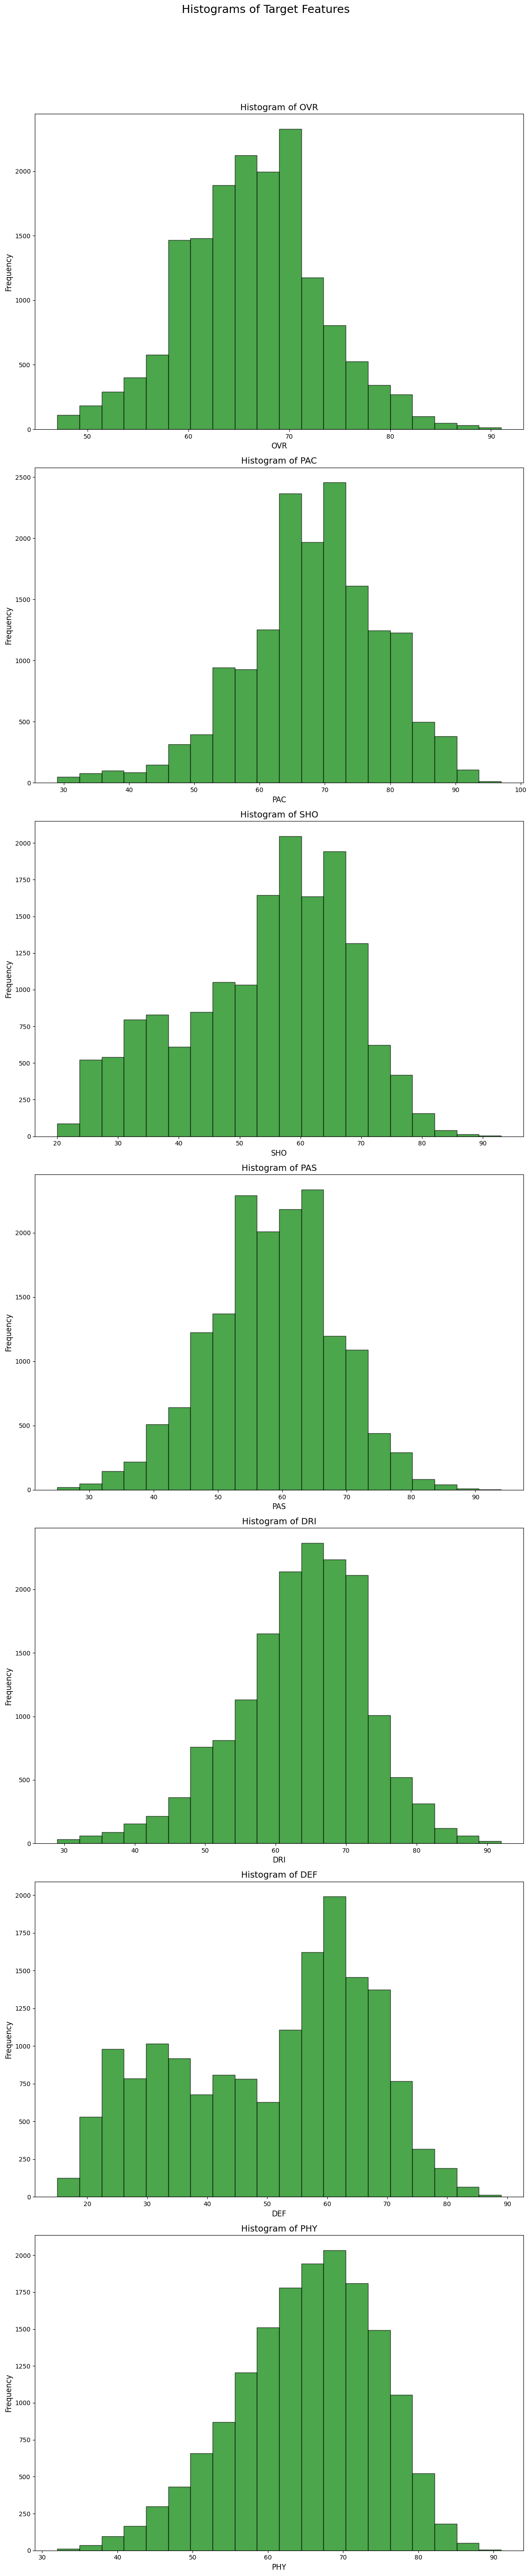

In [ ]:
# List of target columns to plot
target_columns = [ 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']

# Create subplots for each column
fig, axes = plt.subplots(len(target_columns), 1, figsize=(12, 8 * len(target_columns)))  # Adjusting the size for each plot

# Plot histograms for each target column
for i, col in enumerate(target_columns):
    axes[i].hist(df[col], bins=20, color='green', edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frequency', fontsize=12)

# Add a super title for all plots
plt.suptitle('Histograms of Target Features', fontsize=18, y=1.03)

# Adjust the layout
plt.tight_layout()
plt.show()


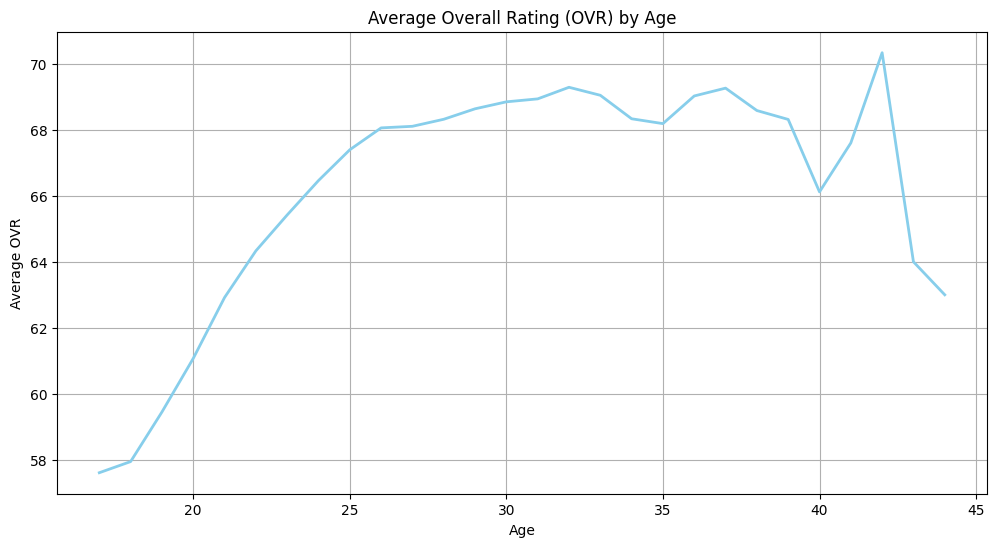

In [ ]:
# Group the data by 'Age' and calculate the mean 'OVR' for each age group
average_ovr_by_age = df.groupby('Age')['OVR'].mean()

# Plot the average OVR for each age group
plt.figure(figsize=(12, 6))
average_ovr_by_age.plot(kind='line', color='skyblue', linewidth=2)
plt.title('Average Overall Rating (OVR) by Age')
plt.xlabel('Age')
plt.ylabel('Average OVR')
plt.grid(True)
plt.show()


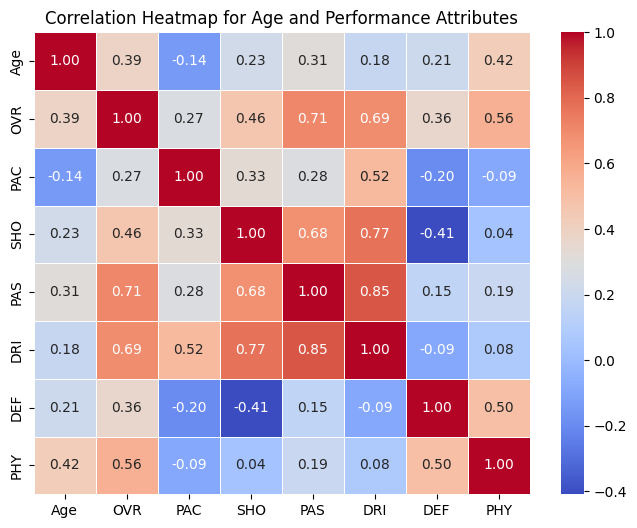

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df[['Age', 'OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY']].corr()

# Set up the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add a title
plt.title("Correlation Heatmap for Age and Performance Attributes")

# Show the plot
plt.show()

In [ ]:
# Filter the dataset to keep only U21 players
df_u21 = df[df['Age'] < 21].copy()

# Display the shape to confirm
print(f"Dataset filtered to U21 players: {df_u21.shape[0]} rows remaining.")


Dataset filtered to U21 players: 2105 rows remaining.


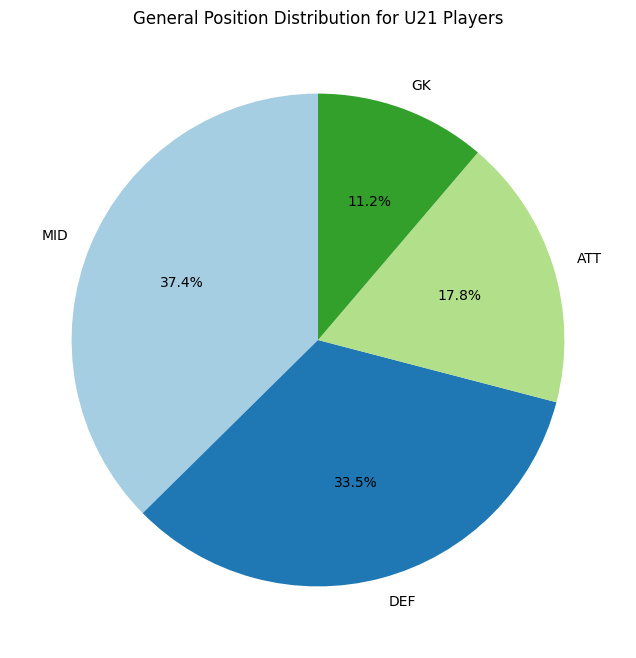

In [ ]:
# First, define the general categories for positions (GK, DEF, MID, ATT)
general_positions = {
    'GK': ['GK'],  # For simplicity, assuming players marked as GK are goalkeepers
    'DEF': ['CB', 'RB', 'LB', 'LWB', 'RWB', 'RCB', 'LCB'],  # All defender-related positions
    'MID': ['CM', 'CDM', 'CAM', 'RM', 'LM', 'RDM', 'LDM'],  # All midfielder-related positions
    'ATT': ['ST', 'CF', 'LW', 'RW', 'LF', 'RF']  # All attacker-related positions
}

# Function to categorize positions into general categories
def categorize_position(position):
    for general_pos, roles in general_positions.items():
        if position in roles:
            return general_pos
    return 'Other'

# Apply the function to categorize the positions
df['General Position'] = df['Position'].apply(categorize_position)

# Plot the general position distribution using a circle (pie) plot
plt.figure(figsize=(8, 8))
df['General Position'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('General Position Distribution for U21 Players')
plt.ylabel('')  # Hide the y-axis label for a cleaner look
plt.show()



**missing values**

---



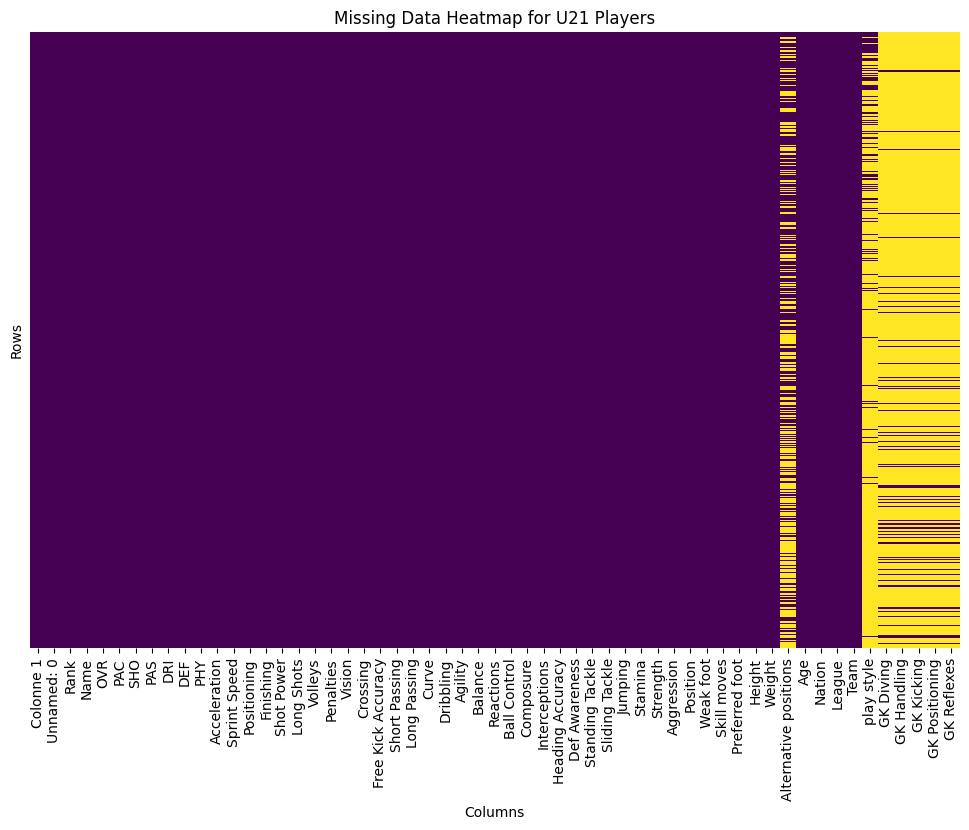

In [ ]:

# Check for missing data
missing_data = df_u21.isnull()

# Create a heatmap to visualize the missing data
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False, xticklabels=True)

# Set title and labels
plt.title('Missing Data Heatmap for U21 Players')
plt.xlabel('Columns')
plt.ylabel('Rows')

plt.show()


**The missing values in goalkeeper-specific features suggest that goalkeepers should be treated as a separate category. Their unique attributes, such as GK Diving and GK Reflexes, are not relevant for outfield players, and vice versa. This separation allows for more accurate training by building specialized models for goalkeepers and outfield players, ensuring each group is trained on the relevant features for better performance.**

**outliers**

---



In [ ]:
# Define a function to detect outliers using the IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers for relevant columns
outliers_ovr = detect_outliers(df_u21, 'OVR')




# Show the outliers
outliers_ovr

,Colonne 1,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,...,Age,Nation,League,Team,play style,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
167,167,167,222,Gavi,83,76,66,78,85,68,...,20,Spain,LALIGA EA SPORTS,FC Barcelona,"Rapid, Relentless, Slide Tackle, Tiki Taka",NaN,NaN,NaN,NaN,NaN
253,253,253,322,Savinho,82,88,72,77,84,30,...,20,Brazil,Premier League,Manchester City,Technical,NaN,NaN,NaN,NaN,NaN
285,285,285,458,Balde,81,91,48,73,78,75,...,20,Spain,LALIGA EA SPORTS,FC Barcelona,"Anticipate, Jockey, Quick Step",NaN,NaN,NaN,NaN,NaN
349,349,349,458,Lamine Yamal,81,82,75,76,82,23,...,17,Spain,LALIGA EA SPORTS,FC Barcelona,"Finesse Shot, Flair, Quick Step, Technical",NaN,NaN,NaN,NaN,NaN
457,457,457,577,Warren Zaïre-Emery,80,79,68,77,80,75,...,18,France,Ligue 1 McDonald's,Paris SG,"First Touch, Press Proven, Quick Step, Tiki Taka",NaN,NaN,NaN,NaN,NaN
517,517,517,736,Alejandro Garnacho,79,86,75,72,81,37,...,20,Argentina,Premier League,Man Utd,"Acrobatic, Finesse Shot, Flair, Quick Step, Te...",NaN,NaN,NaN,NaN,NaN
523,523,523,736,João Neves,79,81,68,75,80,75,...,19,Portugal,Ligue 1 McDonald's,Paris SG,"Press Proven, Relentless",NaN,NaN,NaN,NaN,NaN
603,603,603,736,António Silva,79,80,37,64,69,79,...,20,Portugal,Liga Portugal,SL Benfica,"Block, Intercept, Long Ball Pass",NaN,NaN,NaN,NaN,NaN
665,665,665,970,Ousmane Diomande,78,80,26,53,73,77,...,20,Côte d'Ivoire,Liga Portugal,Sporting CP,"Block, Bruiser, Jockey, Long Ball Pass",NaN,NaN,NaN,NaN,NaN
695,695,695,970,Arda Güler,78,72,73,80,82,52,...,19,Turkey,LALIGA EA SPORTS,Real Madrid,"Finesse Shot, Flair, Incisive Pass, Long Ball ...",NaN,NaN,NaN,NaN,NaN


**The outlier analysis reveals that there aren't many outliers in the dataset. However, these outliers are important as they represent players who either perform exceptionally well or poorly. These extreme values are crucial for our model, as they highlight both exceptional talents and those who may require further development. Instead of removing these outliers, we will retain them, as they provide valuable insights for training the model to handle a wider range of player performances.**

**Since the distribution of ratings and positions is fairly balanced, advanced techniques like SMOTE or other data filling methods are unnecessary. This ensures the model trains effectively without dealing with significant bias or imbalance.**

# Data Preparation

In [ ]:
# Separate goalkeepers (GK) from other players
df_gk = df[df['Position'] == 'GK'].reset_index(drop=True)
df_players = df[df['Position'] != 'GK'].reset_index(drop=True)

**Feature Engineering**

---



In [ ]:
# Drop goalkeeper-specific columns from the outfield players dataset
gk_columns = ['GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning', 'GK Reflexes']
df_players = df_players.drop(columns=gk_columns)

In [ ]:
# Remove the 'AlternativePosition' column from the goalkeepers dataset
df_gk = df_gk.drop(columns=['Alternative positions'])

In [ ]:
df_players.columns = df_players.columns.str.strip()
df_gk.columns = df_gk.columns.str.strip()


In [ ]:
# Remove irrelevant columns
df_players = df_players.drop(columns=['Colonne 1','Name','Rank', 'Unnamed: 0'])


In [ ]:
# Remove irrelevant columns in the GK dataset
df_gk = df_gk.drop(columns=['Colonne 1','Name','Rank','Unnamed: 0'])


✅Prevents Data Leakage – Since OVR is calculated from these, they make the model too easy.
✅ Deployment-Ready – If these features won't be available in production, they shouldn't be in training.
✅ Avoids Overfitting – Removes redundant information that could make the model memorize instead of generalizing.

**handling missing values**





---



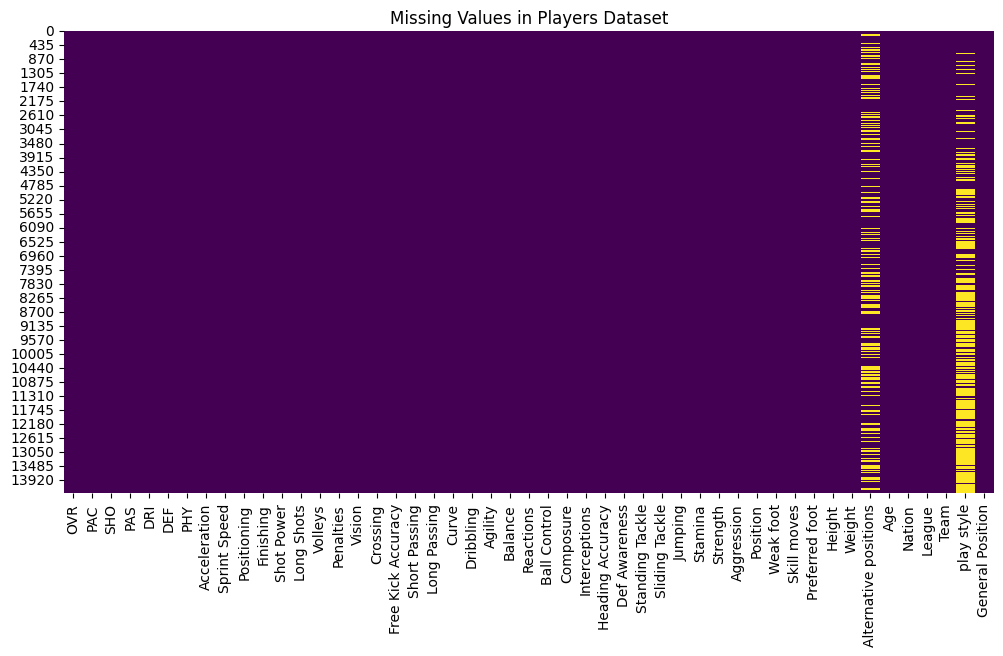

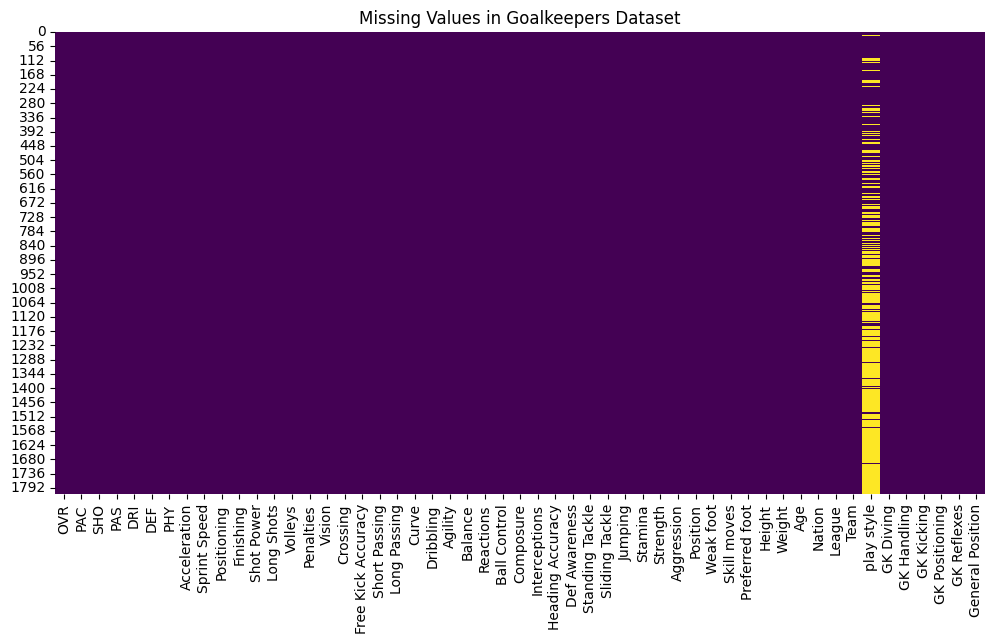

In [ ]:

# Plot missing values heatmap for players dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df_players.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Players Dataset")
plt.show()

# Plot missing values heatmap for goalkeepers dataset
plt.figure(figsize=(12, 6))
sns.heatmap(df_gk.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Goalkeepers Dataset")
plt.show()


In [ ]:
# For players dataset
df_players['Alternative positions'] = df_players['Alternative positions'].fillna('No Alternative Position')
df_players['play style'] = df_players['play style'].fillna('Unknown')

# For goalkeepers dataset
df_gk['play style'] = df_gk['play style'].fillna('Unknown')


**Columns with high missing values are usually dropped. However, 'play style' can be a strong indicator of key attributes (e.g., dribbling play styles often signal high dribbling ratings), so it is retained as a potentially important feature.**

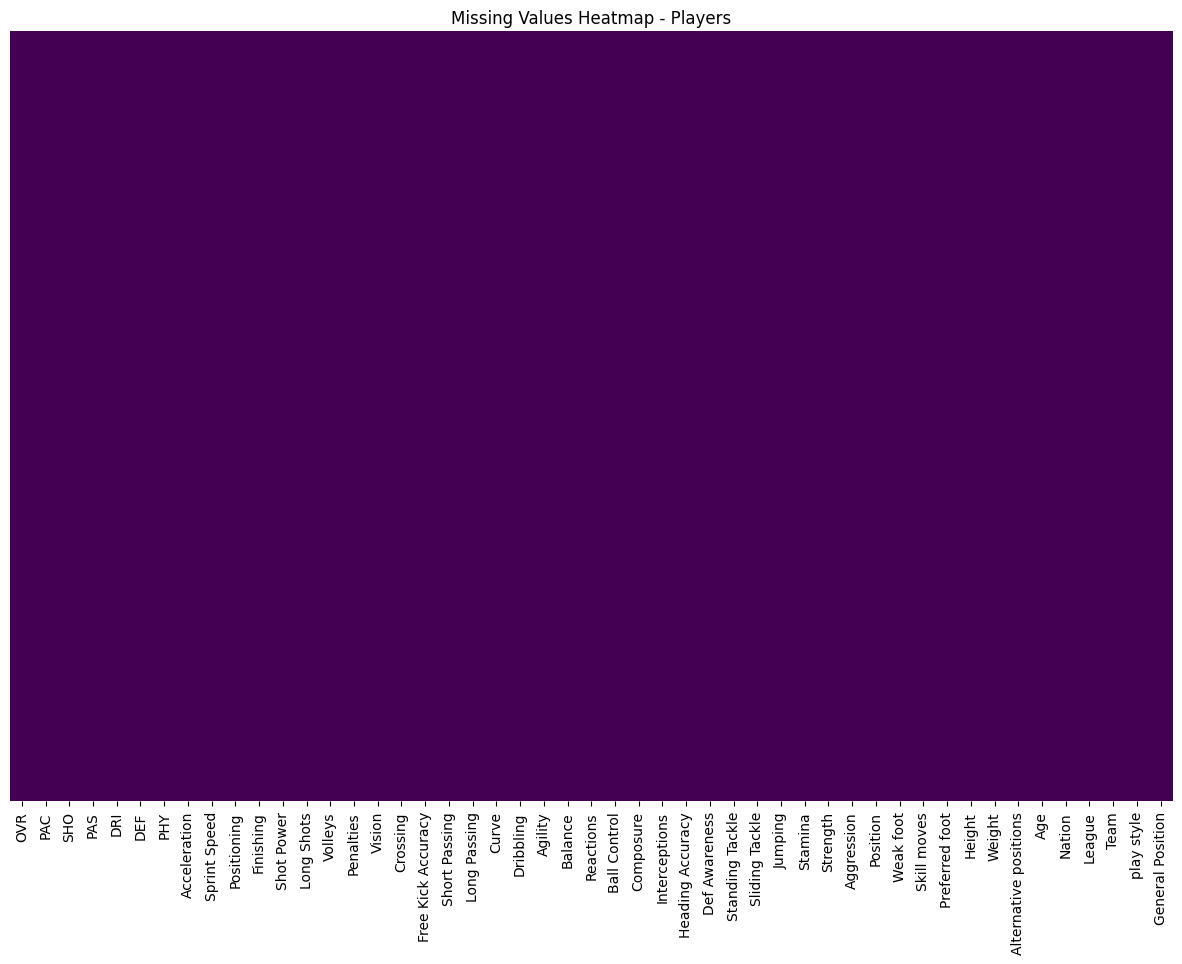

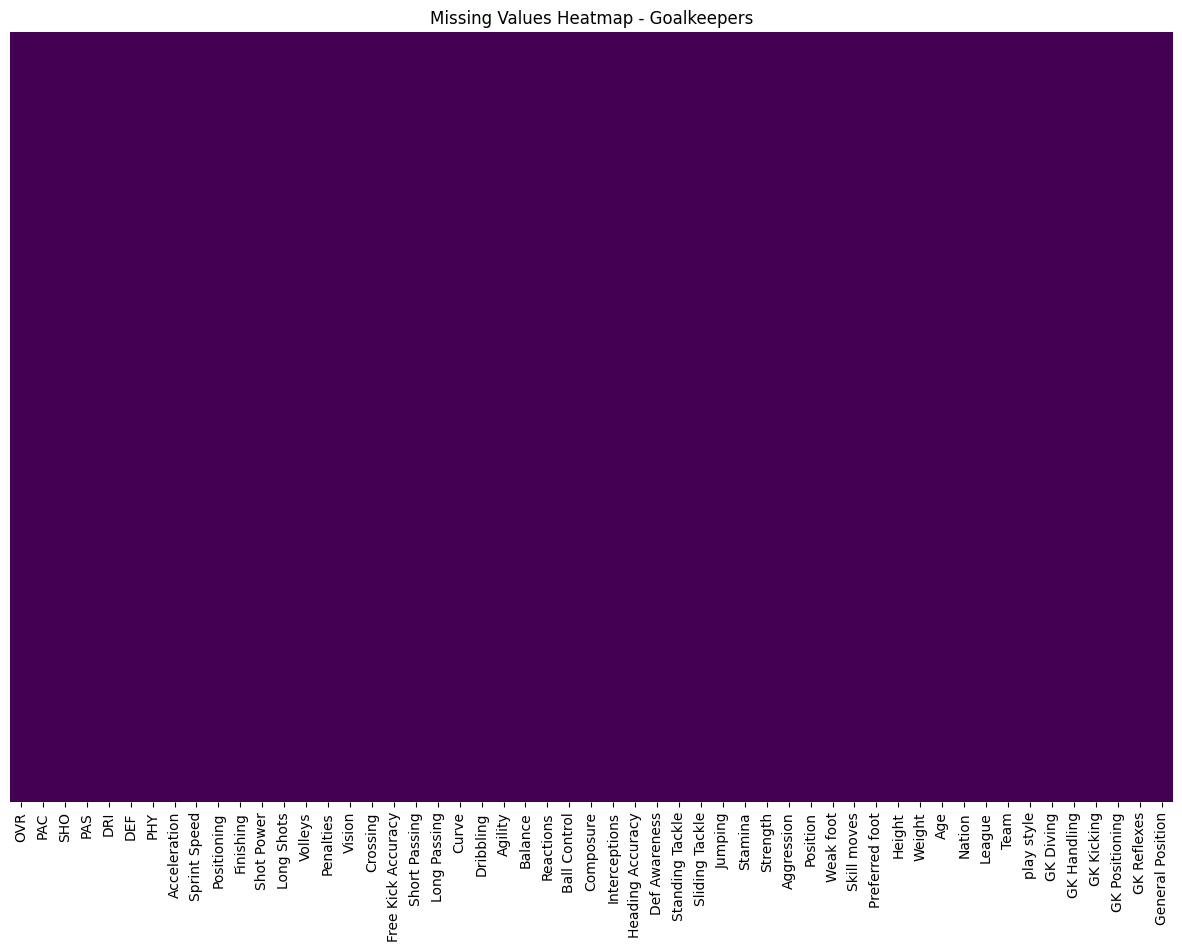

In [ ]:

# Heatmap for missing values in the players dataset
plt.figure(figsize=(15, 10))
sns.heatmap(df_players.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap - Players")
plt.show()

# Heatmap for missing values in the goalkeepers dataset
plt.figure(figsize=(15, 10))
sns.heatmap(df_gk.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Values Heatmap - Goalkeepers")
plt.show()


**handling outleirs**

---



outliers will be retained , as they provide valuable insights for training the model to handle a wider range of player performances.

**Categorical Encoding**

---



In [ ]:
# Identify categorical columns in both datasets
categorical_columns_players = df_players.select_dtypes(include=['object']).columns
categorical_columns_gk = df_gk.select_dtypes(include=['object']).columns

# Show the categorical columns
print("Categorical columns in the players dataset:")
print(categorical_columns_players)

print("\nCategorical columns in the goalkeepers dataset:")
print(categorical_columns_gk)


Categorical columns in the players dataset:
Index(['Position', 'Preferred foot', 'Height', 'Weight',
       'Alternative positions', 'Nation', 'League', 'Team', 'play style',
       'General Position'],
      dtype='object')

Categorical columns in the goalkeepers dataset:
Index(['Position', 'Preferred foot', 'Height', 'Weight', 'Nation', 'League',
       'Team', 'play style', 'General Position'],
      dtype='object')


In [ ]:
# Show the first few rows of the dataset to inspect the columns
print(df_players[['Height', 'Weight']].head())

         Height        Weight
0  182cm / 6'0"  75kg / 165lb
1  191cm / 6'3"  82kg / 181lb
2  195cm / 6'5"  94kg / 207lb
3  186cm / 6'1"  75kg / 165lb
4  176cm / 5'9"  73kg / 161lb


**weight and height**

---



In [ ]:
import re

def clean_height_weight(df):
    def extract_height_weight(value, unit):
        """Extract integer values for height (cm) and weight (kg), handling typos."""
        if not isinstance(value, str):  # Ensure value is a string
            return None
        value = value.lower().strip()
        match = re.search(r"(\d+)\s*" + unit, value)  # Match number followed by cm or kg
        if match:
            return int(match.group(1))
        return None  # Return None if no valid number found

    # Apply extraction to Height and Weight columns
    df['Height'] = df['Height'].astype(str).apply(lambda x: extract_height_weight(x, 'cm'))
    df['Weight'] = df['Weight'].astype(str).apply(lambda x: extract_height_weight(x, 'kg'))

    # Check for any rows with missing (invalid) values after conversion
    invalid_rows = df[df[['Height', 'Weight']].isnull().any(axis=1)]
    if not invalid_rows.empty:
        print(f"\nRows with invalid Height or Weight values in dataset:")
        print(invalid_rows[['Height', 'Weight']])

    return df

# Apply cleaning function to both datasets
df_players = clean_height_weight(df_players)
df_gk = clean_height_weight(df_gk)

# Show final processed data
print("\nFinal Processed Data (Players):")
print(df_players[['Height', 'Weight']].head())

print("\nFinal Processed Data (Goalkeepers):")
print(df_gk[['Height', 'Weight']].head())



Final Processed Data (Players):
   Height  Weight
0     182      75
1     191      82
2     195      94
3     186      75
4     176      73

Final Processed Data (Goalkeepers):
   Height  Weight
0     196      90
1     193      91
2     200      96
3     187      85
4     188      86


In [ ]:
# Show the first few rows of the dataset to inspect the columns
print(df_players[['Height', 'Weight']].head())

   Height  Weight
0     182      75
1     191      82
2     195      94
3     186      75
4     176      73


**Play styles**

---



In [ ]:
max_play_styles = df['play style'].apply(lambda x: len(str(x).split(',')) if pd.notna(x) else 0).max()
print(f"Maximum number of play styles in the dataset: {max_play_styles}")


Maximum number of play styles in the dataset: 7


In [ ]:
def get_unique_play_styles(df, column_name='play style', position_column='Position'):

    unique_styles_players = set()
    unique_styles_gk = set()

    for index, row in df.dropna(subset=[column_name]).iterrows():
        play_styles = [s.strip() for s in row[column_name].split(',')]

        # Check if the position contains "GK" (Goalkeeper)
        if isinstance(row[position_column], str) and "GK" in row[position_column]:
            unique_styles_gk.update(play_styles)
        else:
            unique_styles_players.update(play_styles)

    return unique_styles_players, unique_styles_gk

# Example usage
unique_styles_players, unique_styles_gk = get_unique_play_styles(df)

print("Unique Play Styles for Players:", unique_styles_players)
print("Unique Play Styles for Goalkeepers:", unique_styles_gk)


Unique Play Styles for Players: {'Jockey', 'Trickster+', 'Trivela', 'Jockey+', 'Technical', 'Chip Shot', 'Power Header', 'Quick Step', 'Trivela+', 'Power Shot+', 'Slide Tackle', 'Flair+', 'Dead Ball+', 'Anticipate+', 'Long Throw', 'Slide Tackle+', 'Dead Ball', 'Incisive Pass', 'Relentless', 'Whipped Pass', 'Power Header+', 'Bruiser', 'Technical+', 'Rapid+', 'Power Shot', 'Aerial', 'First Touch', 'Intercept', 'Whipped Pass+', 'Tiki Taka', 'Block+', 'Acrobatic+', 'Block', 'Bruiser+', 'Pinged Pass+', 'Finesse Shot', 'Quick Step+', 'Anticipate', 'Pinged Pass', 'Intercept+', 'Rapid', 'Relentless+', 'Finesse Shot+', 'Long Throw+', 'Tiki Taka+', 'Trickster', 'Acrobatic', 'First Touch+', 'Aerial+', 'Press Proven+', 'Flair', 'Incisive Pass+', 'Long Ball Pass+', 'Press Proven', 'Chip Shot+', 'Long Ball Pass'}
Unique Play Styles for Goalkeepers: {'1v1 Close Down+', 'Far Throw+', 'Cross Claimer', 'Deflector', 'Footwork+', 'Long Ball Pass', 'Pinged Pass+', 'Long Ball Pass+', 'Far Reach', 'Deflector

In [ ]:
# Print column names of df_players to verify
print("Columns in df_players:", df_players.columns)

Columns in df_players: Index(['OVR', 'PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY', 'Acceleration',
       'Sprint Speed', 'Positioning', 'Finishing', 'Shot Power', 'Long Shots',
       'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free Kick Accuracy',
       'Short Passing', 'Long Passing', 'Curve', 'Dribbling', 'Agility',
       'Balance', 'Reactions', 'Ball Control', 'Composure', 'Interceptions',
       'Heading Accuracy', 'Def Awareness', 'Standing Tackle',
       'Sliding Tackle', 'Jumping', 'Stamina', 'Strength', 'Aggression',
       'Position', 'Weak foot', 'Skill moves', 'Preferred foot', 'Height',
       'Weight', 'Alternative positions', 'Age', 'Nation', 'League', 'Team',
       'play style', 'General Position'],
      dtype='object')


In [ ]:


# Define the playstyle groups
play_style_groups = {
    'pace_ps': ['Rapid', 'Rapid+', 'Quick Step', 'Quick Step+'],
    'phy_ps': ['Bruiser', 'Bruiser+', 'Aerial', 'Aerial+', 'Relentless', 'Relentless+'],
    'defending_ps': ['Block', 'Block+', 'Intercept', 'Intercept+', 'Jockey', 'Jockey+', 'Slide Tackle',
                      'Slide Tackle+', 'Anticipate', 'Anticipate+', 'Press Proven', 'Press Proven+'],
    'passing_ps': ['Pinged Pass', 'Pinged Pass+', 'Incisive Pass', 'Incisive Pass+', 'Whipped Pass',
                    'Whipped Pass+', 'Long Ball Pass', 'Long Ball Pass+', 'Tiki Taka', 'Tiki Taka+',
                    'Long Throw', 'Long Throw+'],
    'shooting_ps': ['Power Shot', 'Power Shot+', 'Finesse Shot', 'Finesse Shot+', 'Chip Shot', 'Chip Shot+',
                    'Trivela', 'Trivela+', 'Power Header', 'Power Header+'],
    'dribbling_ps': ['First Touch', 'First Touch+', 'Flair', 'Flair+', 'Trickster', 'Trickster+', 'Technical',
                     'Technical+', 'Acrobatic', 'Acrobatic+', 'Dead Ball', 'Dead Ball+']
}

def encode_play_styles(df, column_name='play style'):
    """
    Encodes play styles by counting the number of play styles in each group.
    Play styles ending with '+' are considered with a value of 2 (for excellence).

    Parameters:
    df (pd.DataFrame): The DataFrame containing player data.
    column_name (str): The column name containing play styles.

    Returns:
    pd.DataFrame: A DataFrame with the encoded play style group columns.
    """
    # Initialize empty columns for each group
    for group in play_style_groups:
        df[group] = 0

    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        # Get the player's play styles (split by commas and strip any extra spaces)
        styles = row[column_name]
        if pd.notna(styles):
            style_list = [s.strip() for s in styles.split(',')]

            # Count how many play styles belong to each group and consider '+' as 2
            for group, group_styles in play_style_groups.items():
                count = 0
                for style in style_list:
                    if style in group_styles:
                        if style.endswith('+'):  # If style ends with '+', count as 2
                            count += 2
                        else:  # Otherwise, count as 1
                            count += 1
                df.at[idx, group] = count  # Set the count for each group

    return df

# Example usage
df_encoded = encode_play_styles(df_players, column_name='play style')

# Display the encoded DataFrame (showing first few columns for a sample)
df_encoded[[ 'pace_ps', 'phy_ps', 'defending_ps', 'passing_ps', 'shooting_ps', 'dribbling_ps']].head()


,pace_ps,phy_ps,defending_ps,passing_ps,shooting_ps,dribbling_ps
0,3,0,0,0,2,2
1,0,2,1,3,1,0
2,0,1,1,0,2,2
3,0,2,2,0,0,2
4,3,0,0,0,3,2


In [ ]:
# Define the goalkeeper playstyle groups
gk_play_style_groups = {
    'handling_ps': ['Cross Claimer', 'Cross Claimer+', '1v1 Close Down', '1v1 Close Down+'],
    'kicking_ps': ['Far Throw', 'Far Throw+', 'Long Ball Pass', 'Long Ball Pass+'],
    'positioning_ps': ['Far Reach', 'Far Reach+', 'Deflector', 'Deflector+'],
    'footwork_ps': ['Footwork', 'Footwork+']
}

def encode_gk_play_styles(df, column_name='play style'):
    """
    Encodes goalkeeper play styles by counting the number of play styles in each group.
    Play styles ending with '+' are considered with a value of 2 (for excellence).

    Parameters:
    df (pd.DataFrame): The DataFrame containing goalkeeper data.
    column_name (str): The column name containing play styles.

    Returns:
    pd.DataFrame: A DataFrame with the encoded play style group columns.
    """
    # Initialize empty columns for each group
    for group in gk_play_style_groups:
        df[group] = 0

    # Iterate over each row in the DataFrame
    for idx, row in df.iterrows():
        # Get the player's play styles (split by commas and strip any extra spaces)
        styles = row[column_name]
        if pd.notna(styles):
            style_list = [s.strip() for s in styles.split(',')]

            # Count how many play styles belong to each group and consider '+' as 2
            for group, group_styles in gk_play_style_groups.items():
                count = 0
                for style in style_list:
                    if style in group_styles:
                        if style.endswith('+'):  # If style ends with '+', count as 2
                            count += 2
                        else:  # Otherwise, count as 1
                            count += 1
                df.at[idx, group] = count  # Set the count for each group

    return df

# Example usage
df_gk_encoded = encode_gk_play_styles(df_gk, column_name='play style')

# Display the encoded DataFrame (showing first few columns for a sample)
df_gk_encoded[[ 'handling_ps', 'kicking_ps', 'positioning_ps', 'footwork_ps']].head()


,handling_ps,kicking_ps,positioning_ps,footwork_ps
0,0,0,2,1
1,1,1,2,0
2,3,1,0,0
3,1,0,0,2
4,1,2,0,0


**We chose counting and grouping over one-hot encoding, as one-hot would create too many columns, leading to a sparse matrix. Label encoding doesn't work well here since players can have up to 7 play styles, making it unsuitable for capturing the full range of abilities. This approach provides a more compact and meaningful representation of the data, preserving the skill diversity without unnecessary complexity.**

In [ ]:
# Drop the 'play style' column from both dataframes
df_players.drop(columns=['play style'], inplace=True)
df_gk.drop(columns=['play style'], inplace=True)

# Get the categorical columns after dropping 'play style'
categorical_columns_players = df_players.select_dtypes(include=['object']).columns.tolist()
categorical_columns_gk = df_gk.select_dtypes(include=['object']).columns.tolist()


In [ ]:
# Return the categorical columns
categorical_columns_players, categorical_columns_gk

(['Position',
  'Preferred foot',
  'Alternative positions',
  'Nation',
  'League',
  'Team',
  'General Position'],
 ['Position',
  'Preferred foot',
  'Nation',
  'League',
  'Team',
  'General Position'])

**label encoding to the rest of the categorical columns**

---



In [ ]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns for df_players
for column in categorical_columns_players:
    df_players[column] = label_encoder.fit_transform(df_players[column])

# Apply label encoding to the categorical columns for df_gk
for column in categorical_columns_gk:
    df_gk[column] = label_encoder.fit_transform(df_gk[column])

# Verify the encoding (checking the first few rows of both DataFrames)
df_players.head(), df_gk.head()

(   OVR  PAC  SHO  PAS  DRI  DEF  PHY  Acceleration  Sprint Speed  Positioning  \
 0   91   97   90   80   92   36   78            97            97           93   
 1   91   66   80   86   84   87   85            65            66           76   
 2   91   88   92   70   81   45   88            80            94           96   
 3   90   80   87   83   88   78   83            81            80           91   
 4   90   95   84   81   91   29   69            95            95           87   
 
    ...  Nation  League  Team  General Position  pace_ps  phy_ps  defending_ps  \
 0  ...      49      18   481                 0        3       0             0   
 1  ...     127      31   373                 2        0       2             1   
 2  ...     105      31   373                 0        0       1             1   
 3  ...      43      18   481                 2        0       2             2   
 4  ...      16      18   481                 0        3       0             0   
 
    passing_

**standarization**

---



In [ ]:


# Initialize the standard scaler
scaler = StandardScaler()

# Separate the target variable (OVR) for df_players
ovr_players = df_players['OVR']

# List of numerical columns for df_players (excluding OVR)
numerical_columns_players = df_players.select_dtypes(include=['int64', 'float64']).columns.drop('OVR')

# Apply standardization to df_players (excluding OVR)
df_players[numerical_columns_players] = scaler.fit_transform(df_players[numerical_columns_players])

# Add the OVR column back to df_players
df_players['OVR'] = ovr_players

# Separate the target variable (OVR) for df_gk
ovr_gk = df_gk['OVR']

# List of numerical columns for df_gk (excluding OVR)
numerical_columns_gk = df_gk.select_dtypes(include=['int64', 'float64']).columns.drop('OVR')

# Apply standardization to df_gk (excluding OVR)
df_gk[numerical_columns_gk] = scaler.fit_transform(df_gk[numerical_columns_gk])

# Add the OVR column back to df_gk
df_gk['OVR'] = ovr_gk

# Verify the standardization (checking the first few rows of both DataFrames)
print("Standardized df_players (OVR excluded):")
print(df_players.head())

print("\nStandardized df_gk (OVR excluded):")
print(df_gk.head())

Standardized df_players (OVR excluded):
   OVR       PAC       SHO       PAS       DRI       DEF       PHY  \
0   91  2.613105  2.653274  2.251615  3.059902 -1.036236  1.299662   
1   91 -0.230388  1.936359  2.863957  2.207566  2.166093  2.024155   
2   91  1.787575  2.796657  1.231045  1.887940 -0.471119  2.334652   
3   90  1.053770  2.438200  2.557786  2.633734  1.600976  1.817157   
4   90  2.429654  2.223125  2.353672  2.953360 -1.475771  0.368171   

   Acceleration  Sprint Speed  Positioning  ...    Nation    League      Team  \
0      2.493618      2.528711     2.602545  ... -0.507296 -0.220860  0.793427   
1     -0.307049     -0.220969     1.399539  ...  1.219838  0.785966  0.220146   
2      1.005764      2.262613     2.814840  ...  0.732697  0.785966  0.220146   
3      1.093285      1.020822     2.461014  ... -0.640153 -0.220860  0.793427   
4      2.318577      2.351312     2.177954  ... -1.238007 -0.220860  0.793427   

   General Position   pace_ps    phy_ps  defending_p

**Splitting Data**

---



In [ ]:
# Splitting df_players into separate DataFrames for each attribute
pac = df_players[['PAC'] + [col for col in df_players.columns if col != 'PAC']]
sho = df_players[['SHO'] + [col for col in df_players.columns if col != 'SHO']]
pas = df_players[['PAS'] + [col for col in df_players.columns if col != 'PAS']]
dri = df_players[['DRI'] + [col for col in df_players.columns if col != 'DRI']]
def_ = df_players[['DEF'] + [col for col in df_players.columns if col != 'DEF']]
phy = df_players[['PHY'] + [col for col in df_players.columns if col != 'PHY']]
ovr = df_players[['OVR'] + [col for col in df_players.columns if col != 'OVR']]

# For df_gk, the split will only be for OVR since it's the only target
gk_ovr = df_gk[['OVR'] + [col for col in df_gk.columns if col != 'OVR']]

# Output the new DataFrames for verification
print("DataFrames for df_players:")
print("PAC DataFrame:", pac.shape)
print("SHO DataFrame:", sho.shape)
print("PAS DataFrame:", pas.shape)
print("DRI DataFrame:", dri.shape)
print("DEF DataFrame:", def_.shape)
print("PHY DataFrame:", phy.shape)
print("OVR DataFrame:", ovr.shape)

print("\nDataFrame for df_gk:")
print("OVR DataFrame:", gk_ovr.shape)

DataFrames for df_players:
PAC DataFrame: (14344, 54)
SHO DataFrame: (14344, 54)
PAS DataFrame: (14344, 54)
DRI DataFrame: (14344, 54)
DEF DataFrame: (14344, 54)
PHY DataFrame: (14344, 54)
OVR DataFrame: (14344, 54)

DataFrame for df_gk:
OVR DataFrame: (1816, 56)


In [ ]:

# For df_players:
X_pac = pac.drop(columns=['PAC'])
y_pac = pac['PAC']

X_sho = sho.drop(columns=['SHO'])
y_sho = sho['SHO']

X_pas = pas.drop(columns=['PAS'])
y_pas = pas['PAS']

X_dri = dri.drop(columns=['DRI'])
y_dri = dri['DRI']

X_def = def_.drop(columns=['DEF'])
y_def = def_['DEF']

X_phy = phy.drop(columns=['PHY'])
y_phy = phy['PHY']

X_ovr = ovr.drop(columns=['OVR'])
y_ovr = ovr['OVR']

# For df_gk (since it's only predicting OVR):
X_gk = gk_ovr.drop(columns=['OVR'])
y_gk = gk_ovr['OVR']

# Train-test split for each target (80% training, 20% testing)
X_train_pac, X_test_pac, y_train_pac, y_test_pac = train_test_split(X_pac, y_pac, test_size=0.2, random_state=42)
X_train_sho, X_test_sho, y_train_sho, y_test_sho = train_test_split(X_sho, y_sho, test_size=0.2, random_state=42)
X_train_pas, X_test_pas, y_train_pas, y_test_pas = train_test_split(X_pas, y_pas, test_size=0.2, random_state=42)
X_train_dri, X_test_dri, y_train_dri, y_test_dri = train_test_split(X_dri, y_dri, test_size=0.2, random_state=42)
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.2, random_state=42)
X_train_phy, X_test_phy, y_train_phy, y_test_phy = train_test_split(X_phy, y_phy, test_size=0.2, random_state=42)
X_train_ovr, X_test_ovr, y_train_ovr, y_test_ovr = train_test_split(X_ovr, y_ovr, test_size=0.2, random_state=42)

# For df_gk (OVR):
X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_gk, y_gk, test_size=0.2, random_state=42)

# Print shapes to verify
print(f"Training and Testing split for PAC: X_train={X_train_pac.shape}, X_test={X_test_pac.shape}")
print(f"Training and Testing split for SHO: X_train={X_train_sho.shape}, X_test={X_test_sho.shape}")
print(f"Training and Testing split for PAS: X_train={X_train_pas.shape}, X_test={X_test_pas.shape}")
print(f"Training and Testing split for DRI: X_train={X_train_dri.shape}, X_test={X_test_dri.shape}")
print(f"Training and Testing split for DEF: X_train={X_train_def.shape}, X_test={X_test_def.shape}")
print(f"Training and Testing split for PHY: X_train={X_train_phy.shape}, X_test={X_test_phy.shape}")
print(f"Training and Testing split for OVR: X_train={X_train_ovr.shape}, X_test={X_test_ovr.shape}")

print(f"\nTraining and Testing split for GK OVR: X_train={X_train_gk.shape}, X_test={X_test_gk.shape}")


Training and Testing split for PAC: X_train=(11475, 53), X_test=(2869, 53)
Training and Testing split for SHO: X_train=(11475, 53), X_test=(2869, 53)
Training and Testing split for PAS: X_train=(11475, 53), X_test=(2869, 53)
Training and Testing split for DRI: X_train=(11475, 53), X_test=(2869, 53)
Training and Testing split for DEF: X_train=(11475, 53), X_test=(2869, 53)
Training and Testing split for PHY: X_train=(11475, 53), X_test=(2869, 53)
Training and Testing split for OVR: X_train=(11475, 53), X_test=(2869, 53)

Training and Testing split for GK OVR: X_train=(1452, 55), X_test=(364, 55)


# Modeling

**Random Forest**

---



In [ ]:
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, ],
    'min_samples_leaf': [1, 2]
}




In [ ]:
# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

In [ ]:
# GridSearchCV for each target

grid_search_rf_ovr_players = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3,
                                          scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_rf_ovr_gk = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=3,
                                     scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

In [ ]:


# Fit model for players' OVR target
grid_search_rf_ovr_players.fit(X_train_ovr, y_train_ovr)

# Fit model for goalkeepers' OVR target
grid_search_rf_ovr_gk.fit(X_train_gk, y_train_gk)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Assign the best models
best_rf_ovr_players = grid_search_rf_ovr_players.best_estimator_
best_rf_ovr_gk = grid_search_rf_ovr_gk.best_estimator_


In [ ]:
# Predict on test set for players and goalkeepers (Random Forest)
y_pred_ovr_players_rf = best_rf_ovr_players.predict(X_test_ovr)  # Unique variable for RF players
y_pred_ovr_gk_rf = best_rf_ovr_gk.predict(X_test_gk)  # Unique variable for RF goalkeepers

# Compute test MSE and R² for players (Random Forest)
mse_ovr_players_rf = mean_squared_error(y_test_ovr, y_pred_ovr_players_rf)
r2_ovr_players_rf = r2_score(y_test_ovr, y_pred_ovr_players_rf)

# Compute test MSE and R² for goalkeepers (Random Forest)
mse_ovr_gk_rf = mean_squared_error(y_test_gk, y_pred_ovr_gk_rf)
r2_ovr_gk_rf = r2_score(y_test_gk, y_pred_ovr_gk_rf)

# Print performance metrics for Random Forest
print("\nPerformance for Players' OVR (Random Forest):")
print(f"Test MSE: {mse_ovr_players_rf:.4f}")
print(f"Test R²: {r2_ovr_players_rf:.4f}")

print("\nPerformance for Goalkeepers' OVR (Random Forest):")
print(f"Test MSE: {mse_ovr_gk_rf:.4f}")
print(f"Test R²: {r2_ovr_gk_rf:.4f}")


Performance for Players' OVR (Random Forest):
Test MSE: 0.9906
Test R²: 0.9780

Performance for Goalkeepers' OVR (Random Forest):
Test MSE: 0.4602
Test R²: 0.9912


In [ ]:

# Predict on test set
y_pred_ovr_players = best_rf_ovr_players.predict(X_test_ovr)
y_pred_ovr_gk = best_rf_ovr_gk.predict(X_test_gk)

**XGBOOST**

---



In [ ]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)


In [ ]:
param_grid_xgb = {
    'max_depth': [3, 4],  # Further reduce depth
    'n_estimators': [50, 75],  # Reduce number of trees
    'learning_rate': [0.02, 0.05],  # Lower learning rate
    'subsample': [0.6],  # Use even less data per tree
    'colsample_bytree': [0.6],  # Use fewer features per tree
    'min_child_weight': [10],  # Require more samples per leaf
    'reg_alpha': [0.5, 1, 2],  # Increase L1 Regularization
    'reg_lambda': [1, 2, 5],  # Increase L2 Regularization
}


Comparison of Top 5 Features for Each Model:
  Random Forest (Players)  Importance (RF Players) Random Forest (GK)  \
0               Reactions                 0.169590     GK Positioning   
1            Ball Control                 0.126535          GK Diving   
2               Composure                 0.075997        GK Handling   
3           Short Passing                 0.065738                DRI   
4                     DRI                 0.050188                PAC   

   Importance (RF GK) XGBoost (Players)  Importance (XGBoost Players)  \
0            0.127837         Composure                      0.277273   
1            0.115742         Reactions                      0.191804   
2            0.108550      Ball Control                      0.081970   
3            0.108117         Dribbling                      0.078665   
4            0.103001     Short Passing                      0.077671   

     XGBoost (GK)  Importance (XGBoost GK)  
0             DRI               

In [ ]:
grid_search_xgb_ovr_players = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb_ovr_gk = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    param_grid=param_grid_xgb,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search_xgb_ovr_players.fit(X_train_ovr, y_train_ovr)
grid_search_xgb_ovr_gk.fit(X_train_gk, y_train_gk)


Fitting 3 folds for each of 72 candidates, totalling 216 fits
Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6],
                         'learning_rate': [0.02, 0.05], 'max_depth': [3, 4],
                         'min_child_weight': [10], 'n_estimators': [50, 75],
                         'reg_alpha': [0.5, 1, 2], 'reg_lambda': [1, 2, 5],
                         'subsample': [0.6]},
             scoring='neg_mean_squared_error', verbose=2)

In [ ]:
# Assign the best models
best_xgb_ovr_players = grid_search_xgb_ovr_players.best_estimator_
best_xgb_ovr_gk = grid_search_xgb_ovr_gk.best_estimator_

In [ ]:
# Predict on test set for players and goalkeepers (XGBoost)
y_pred_ovr_players_xgb = best_xgb_ovr_players.predict(X_test_ovr)  # Unique variable for XGBoost players
y_pred_ovr_gk_xgb = best_xgb_ovr_gk.predict(X_test_gk)  # Unique variable for XGBoost goalkeepers

# Compute test MSE and R² for players (XGBoost)
mse_ovr_players_xgb = mean_squared_error(y_test_ovr, y_pred_ovr_players_xgb)
r2_ovr_players_xgb = r2_score(y_test_ovr, y_pred_ovr_players_xgb)

# Compute test MSE and R² for goalkeepers (XGBoost)
mse_ovr_gk_xgb = mean_squared_error(y_test_gk, y_pred_ovr_gk_xgb)
r2_ovr_gk_xgb = r2_score(y_test_gk, y_pred_ovr_gk_xgb)

# Print performance metrics for XGBoost
print("\nPerformance for Players' OVR (XGBoost):")
print(f"Test MSE: {mse_ovr_players_xgb:.4f}")
print(f"Test R²: {r2_ovr_players_xgb:.4f}")

print("\nPerformance for Goalkeepers' OVR (XGBoost):")
print(f"Test MSE: {mse_ovr_gk_xgb:.4f}")
print(f"Test R²: {r2_ovr_gk_xgb:.4f}")


Performance for Players' OVR (XGBoost):
Test MSE: 1.5570
Test R²: 0.9653

Performance for Goalkeepers' OVR (XGBoost):
Test MSE: 0.2979
Test R²: 0.9943


**SVR**

---



In [ ]:

# Define the parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

# Initialize SVR model
svr = SVR()

# GridSearchCV for SVR (players)
grid_search_svr_ovr_players = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# GridSearchCV for SVR (goalkeepers)
grid_search_svr_ovr_gk = GridSearchCV(
    estimator=svr,
    param_grid=param_grid_svr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit SVR model for players' OVR
grid_search_svr_ovr_players.fit(X_train_ovr, y_train_ovr)

# Fit SVR model for goalkeepers' OVR
grid_search_svr_ovr_gk.fit(X_train_gk, y_train_gk)

# Best parameters and scores
print("Best parameters for players' OVR (SVR):", grid_search_svr_ovr_players.best_params_)
print("Best negative MSE for players' OVR (SVR):", grid_search_svr_ovr_players.best_score_)
print("\nBest parameters for goalkeepers' OVR (SVR):", grid_search_svr_ovr_gk.best_params_)
print("Best negative MSE for goalkeepers' OVR (SVR):", grid_search_svr_ovr_gk.best_score_)

# Save the best models
best_svr_ovr_players = grid_search_svr_ovr_players.best_estimator_
best_svr_ovr_gk = grid_search_svr_ovr_gk.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters for players' OVR (SVR): {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Best negative MSE for players' OVR (SVR): -0.7666174732810601

Best parameters for goalkeepers' OVR (SVR): {'C': 0.1, 'epsilon': 0.5, 'kernel': 'linear'}
Best negative MSE for goalkeepers' OVR (SVR): -0.10077534207270696


In [ ]:
# Predict on test set for players and goalkeepers (SVR)
y_pred_ovr_players_svr = best_svr_ovr_players.predict(X_test_ovr)
y_pred_ovr_gk_svr = best_svr_ovr_gk.predict(X_test_gk)

# Compute test MSE and R² for players (SVR)
mse_ovr_players_svr = mean_squared_error(y_test_ovr, y_pred_ovr_players_svr)
r2_ovr_players_svr = r2_score(y_test_ovr, y_pred_ovr_players_svr)

# Compute test MSE and R² for goalkeepers (SVR)
mse_ovr_gk_svr = mean_squared_error(y_test_gk, y_pred_ovr_gk_svr)
r2_ovr_gk_svr = r2_score(y_test_gk, y_pred_ovr_gk_svr)

# Print performance metrics for SVR
print("\nPerformance for Players' OVR (SVR):")
print(f"Test MSE: {mse_ovr_players_svr:.4f}")
print(f"Test R²: {r2_ovr_players_svr:.4f}")

print("\nPerformance for Goalkeepers' OVR (SVR):")
print(f"Test MSE: {mse_ovr_gk_svr:.4f}")
print(f"Test R²: {r2_ovr_gk_svr:.4f}")


Performance for Players' OVR (SVR):
Test MSE: 0.6294
Test R²: 0.9860

Performance for Goalkeepers' OVR (SVR):
Test MSE: 0.0945
Test R²: 0.9982


**GBR**

---



In [ ]:

# Define the parameter grid for GBR
param_grid_gbr = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize GBR model
gbr = GradientBoostingRegressor(random_state=42)

# GridSearchCV for GBR (players)
grid_search_gbr_ovr_players = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gbr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# GridSearchCV for GBR (goalkeepers)
grid_search_gbr_ovr_gk = GridSearchCV(
    estimator=gbr,
    param_grid=param_grid_gbr,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GBR model for players' OVR
grid_search_gbr_ovr_players.fit(X_train_ovr, y_train_ovr)

# Fit GBR model for goalkeepers' OVR
grid_search_gbr_ovr_gk.fit(X_train_gk, y_train_gk)

# Best parameters and scores
print("Best parameters for players' OVR (GBR):", grid_search_gbr_ovr_players.best_params_)
print("Best negative MSE for players' OVR (GBR):", grid_search_gbr_ovr_players.best_score_)
print("\nBest parameters for goalkeepers' OVR (GBR):", grid_search_gbr_ovr_gk.best_params_)
print("Best negative MSE for goalkeepers' OVR (GBR):", grid_search_gbr_ovr_gk.best_score_)

# Save the best models
best_gbr_ovr_players = grid_search_gbr_ovr_players.best_estimator_
best_gbr_ovr_gk = grid_search_gbr_ovr_gk.best_estimator_

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters for players' OVR (GBR): {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best negative MSE for players' OVR (GBR): -0.8628549717321982

Best parameters for goalkeepers' OVR (GBR): {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best negative MSE for goalkeepers' OVR (GBR): -0.2723635768884349


In [ ]:
# Predict on test set for players and goalkeepers (GBR)
y_pred_ovr_players_gbr = best_gbr_ovr_players.predict(X_test_ovr)
y_pred_ovr_gk_gbr = best_gbr_ovr_gk.predict(X_test_gk)

# Compute test MSE and R² for players (GBR)
mse_ovr_players_gbr = mean_squared_error(y_test_ovr, y_pred_ovr_players_gbr)
r2_ovr_players_gbr = r2_score(y_test_ovr, y_pred_ovr_players_gbr)

# Compute test MSE and R² for goalkeepers (GBR)
mse_ovr_gk_gbr = mean_squared_error(y_test_gk, y_pred_ovr_gk_gbr)
r2_ovr_gk_gbr = r2_score(y_test_gk, y_pred_ovr_gk_gbr)

# Print performance metrics for GBR
print("\nPerformance for Players' OVR (GBR):")
print(f"Test MSE: {mse_ovr_players_gbr:.4f}")
print(f"Test R²: {r2_ovr_players_gbr:.4f}")

print("\nPerformance for Goalkeepers' OVR (GBR):")
print(f"Test MSE: {mse_ovr_gk_gbr:.4f}")
print(f"Test R²: {r2_ovr_gk_gbr:.4f}")


Performance for Players' OVR (GBR):
Test MSE: 0.8608
Test R²: 0.9808

Performance for Goalkeepers' OVR (GBR):
Test MSE: 0.2264
Test R²: 0.9957


**comparing models**

---



In [ ]:


# Define the data for the table
table_data = [
    ["Random Forest", mse_ovr_players_rf, r2_ovr_players_rf, mse_ovr_gk_rf, r2_ovr_gk_rf],
    ["XGBoost", mse_ovr_players_xgb, r2_ovr_players_xgb, mse_ovr_gk_xgb, r2_ovr_gk_xgb],
    ["SVR", mse_ovr_players_svr, r2_ovr_players_svr, mse_ovr_gk_svr, r2_ovr_gk_svr],
    ["GBR", mse_ovr_players_gbr, r2_ovr_players_gbr, mse_ovr_gk_gbr, r2_ovr_gk_gbr]
]

# Define the new table headers
headers = ["Model", "Test MSE (Players)", "Test R² (Players)", "Test MSE (Goalkeepers)", "Test R² (Goalkeepers)"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".4f"))


+---------------+----------------------+---------------------+--------------------------+-------------------------+
| Model         |   Test MSE (Players) |   Test R² (Players) |   Test MSE (Goalkeepers) |   Test R² (Goalkeepers) |
+===============+======================+=====================+==========================+=========================+
| Random Forest |               0.9906 |              0.9780 |                   0.4602 |                  0.9912 |
+---------------+----------------------+---------------------+--------------------------+-------------------------+
| XGBoost       |               1.5570 |              0.9653 |                   0.2979 |                  0.9943 |
+---------------+----------------------+---------------------+--------------------------+-------------------------+
| SVR           |               0.6294 |              0.9860 |                   0.0945 |                  0.9982 |
+---------------+----------------------+---------------------+----------

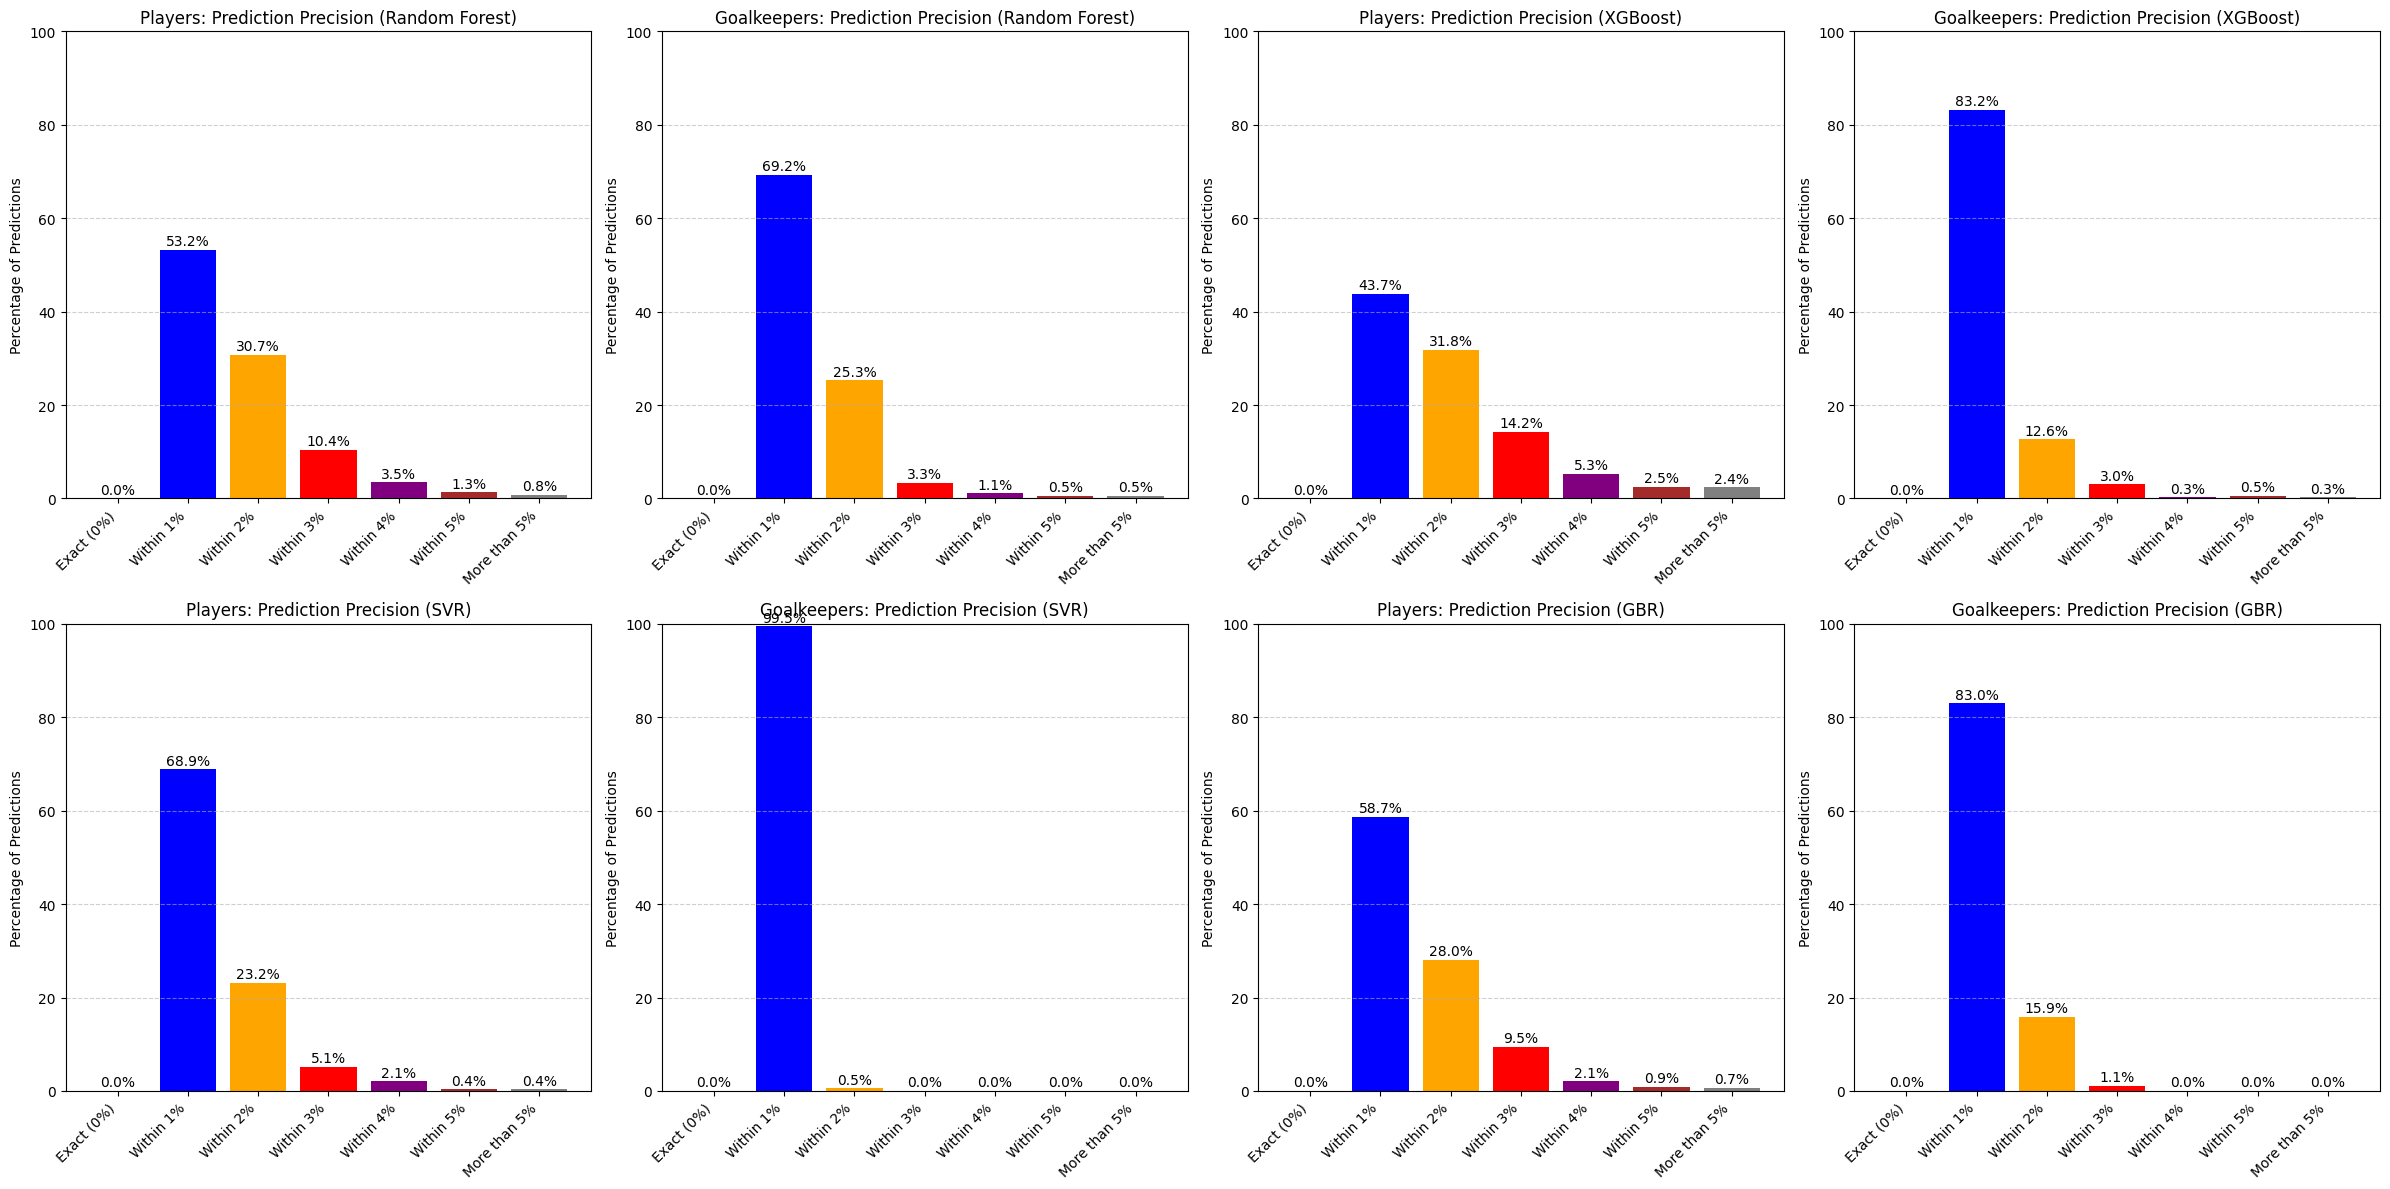

In [ ]:


# Function to calculate percentage errors and categorize predictions
def categorize_predictions(y_actual, y_pred):
    # Calculate percentage errors
    percentage_errors = ((y_pred - y_actual) / y_actual) * 100

    # Categorize predictions
    exact_match = np.sum(percentage_errors == 0)
    within_1_percent = np.sum(np.abs(percentage_errors) <= 1) - exact_match
    within_2_percent = np.sum(np.abs(percentage_errors) <= 2) - np.sum(np.abs(percentage_errors) <= 1)
    within_3_percent = np.sum(np.abs(percentage_errors) <= 3) - np.sum(np.abs(percentage_errors) <= 2)
    within_4_percent = np.sum(np.abs(percentage_errors) <= 4) - np.sum(np.abs(percentage_errors) <= 3)
    within_5_percent = np.sum(np.abs(percentage_errors) <= 5) - np.sum(np.abs(percentage_errors) <= 4)
    more_than_5_percent = np.sum(np.abs(percentage_errors) > 5)

    # Total number of predictions
    total_predictions = len(y_actual)

    # Calculate percentages
    percent_exact = (exact_match / total_predictions) * 100
    percent_within_1 = (within_1_percent / total_predictions) * 100
    percent_within_2 = (within_2_percent / total_predictions) * 100
    percent_within_3 = (within_3_percent / total_predictions) * 100
    percent_within_4 = (within_4_percent / total_predictions) * 100
    percent_within_5 = (within_5_percent / total_predictions) * 100
    percent_more_than_5 = (more_than_5_percent / total_predictions) * 100

    # Return percentages
    return [percent_exact, percent_within_1, percent_within_2, percent_within_3, percent_within_4, percent_within_5, percent_more_than_5]

# Categorize predictions for players and goalkeepers (Random Forest)
players_percentages_rf = categorize_predictions(y_test_ovr, y_pred_ovr_players)
gk_percentages_rf = categorize_predictions(y_test_gk, y_pred_ovr_gk)

# Categorize predictions for players and goalkeepers (XGBoost)
players_percentages_xgb = categorize_predictions(y_test_ovr, y_pred_ovr_players_xgb)
gk_percentages_xgb = categorize_predictions(y_test_gk, y_pred_ovr_gk_xgb)

# Categorize predictions for players and goalkeepers (SVR)
players_percentages_svr = categorize_predictions(y_test_ovr, y_pred_ovr_players_svr)
gk_percentages_svr = categorize_predictions(y_test_gk, y_pred_ovr_gk_svr)

# Categorize predictions for players and goalkeepers (GBR)
players_percentages_gbr = categorize_predictions(y_test_ovr, y_pred_ovr_players_gbr)
gk_percentages_gbr = categorize_predictions(y_test_gk, y_pred_ovr_gk_gbr)

# Labels for the bar plot
labels = ['Exact (0%)', 'Within 1%', 'Within 2%', 'Within 3%', 'Within 4%', 'Within 5%', 'More than 5%']

# Create a single figure with subplots
fig, axes = plt.subplots(2, 4, figsize=(24, 12))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot for Random Forest
axes[0].bar(labels, players_percentages_rf, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[0].set_title('Players: Prediction Precision (Random Forest)')
axes[0].set_ylabel('Percentage of Predictions')
axes[0].set_ylim(0, 100)
axes[0].grid(axis='y', linestyle='--', alpha=0.6)

axes[1].bar(labels, gk_percentages_rf, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[1].set_title('Goalkeepers: Prediction Precision (Random Forest)')
axes[1].set_ylabel('Percentage of Predictions')
axes[1].set_ylim(0, 100)
axes[1].grid(axis='y', linestyle='--', alpha=0.6)

# Plot for XGBoost
axes[2].bar(labels, players_percentages_xgb, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[2].set_title('Players: Prediction Precision (XGBoost)')
axes[2].set_ylabel('Percentage of Predictions')
axes[2].set_ylim(0, 100)
axes[2].grid(axis='y', linestyle='--', alpha=0.6)

axes[3].bar(labels, gk_percentages_xgb, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[3].set_title('Goalkeepers: Prediction Precision (XGBoost)')
axes[3].set_ylabel('Percentage of Predictions')
axes[3].set_ylim(0, 100)
axes[3].grid(axis='y', linestyle='--', alpha=0.6)

# Plot for SVR
axes[4].bar(labels, players_percentages_svr, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[4].set_title('Players: Prediction Precision (SVR)')
axes[4].set_ylabel('Percentage of Predictions')
axes[4].set_ylim(0, 100)
axes[4].grid(axis='y', linestyle='--', alpha=0.6)

axes[5].bar(labels, gk_percentages_svr, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[5].set_title('Goalkeepers: Prediction Precision (SVR)')
axes[5].set_ylabel('Percentage of Predictions')
axes[5].set_ylim(0, 100)
axes[5].grid(axis='y', linestyle='--', alpha=0.6)

# Plot for GBR
axes[6].bar(labels, players_percentages_gbr, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[6].set_title('Players: Prediction Precision (GBR)')
axes[6].set_ylabel('Percentage of Predictions')
axes[6].set_ylim(0, 100)
axes[6].grid(axis='y', linestyle='--', alpha=0.6)

axes[7].bar(labels, gk_percentages_gbr, color=['green', 'blue', 'orange', 'red', 'purple', 'brown', 'gray'])
axes[7].set_title('Goalkeepers: Prediction Precision (GBR)')
axes[7].set_ylabel('Percentage of Predictions')
axes[7].set_ylim(0, 100)
axes[7].grid(axis='y', linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
for ax in axes:
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Add annotations to the bars
for i, ax in enumerate(axes):
    if i % 2 == 0:
        percentages = [players_percentages_rf, players_percentages_xgb, players_percentages_svr, players_percentages_gbr][i // 2]
    else:
        percentages = [gk_percentages_rf, gk_percentages_xgb, gk_percentages_svr, gk_percentages_gbr][i // 2]
    for j, value in enumerate(percentages):
        ax.text(j, value + 1, f"{value:.1f}%", ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-66-408580d6ca0c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


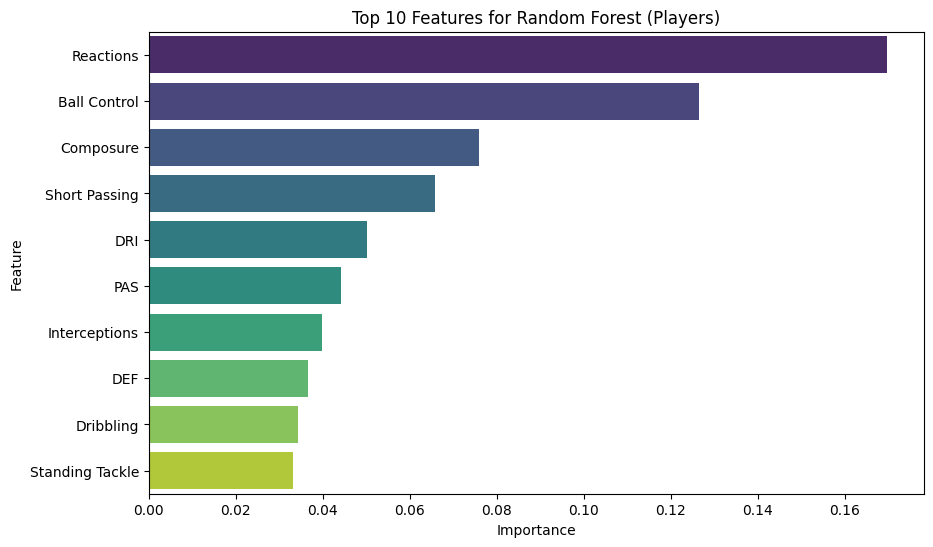

<ipython-input-66-408580d6ca0c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


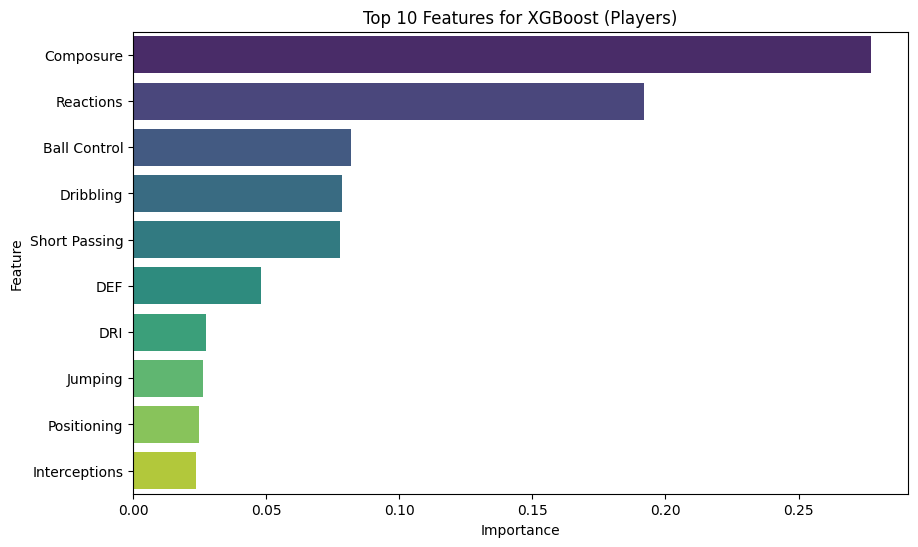

Model SVR (Players) does not support feature importance extraction.


<ipython-input-66-408580d6ca0c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


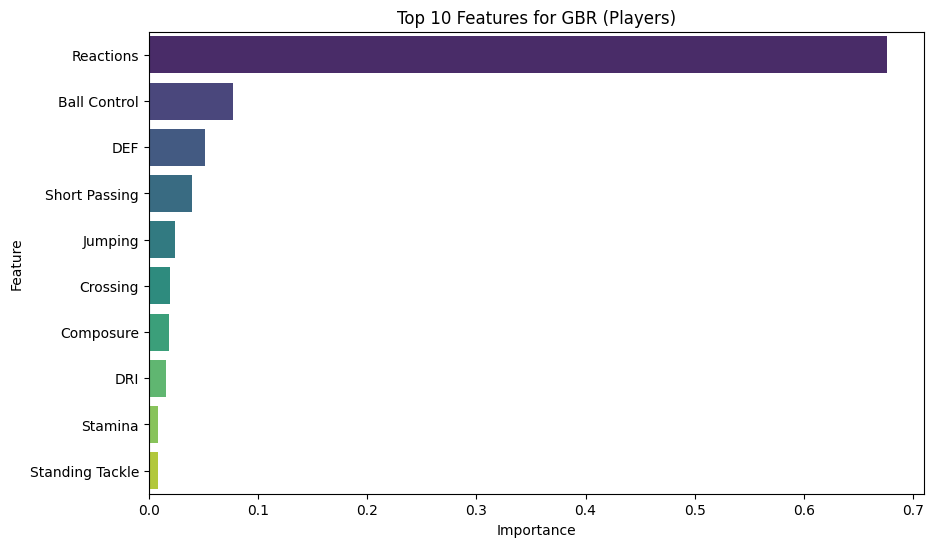

<ipython-input-66-408580d6ca0c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


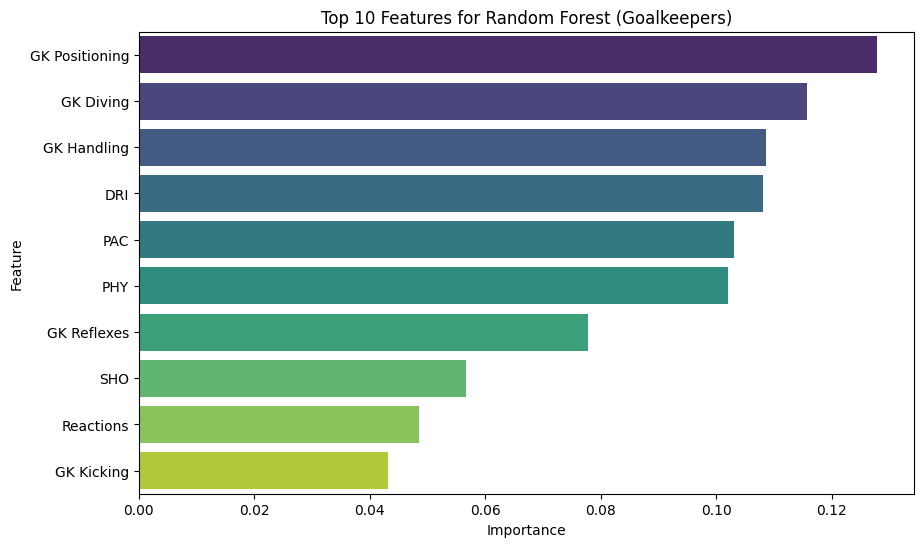

<ipython-input-66-408580d6ca0c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


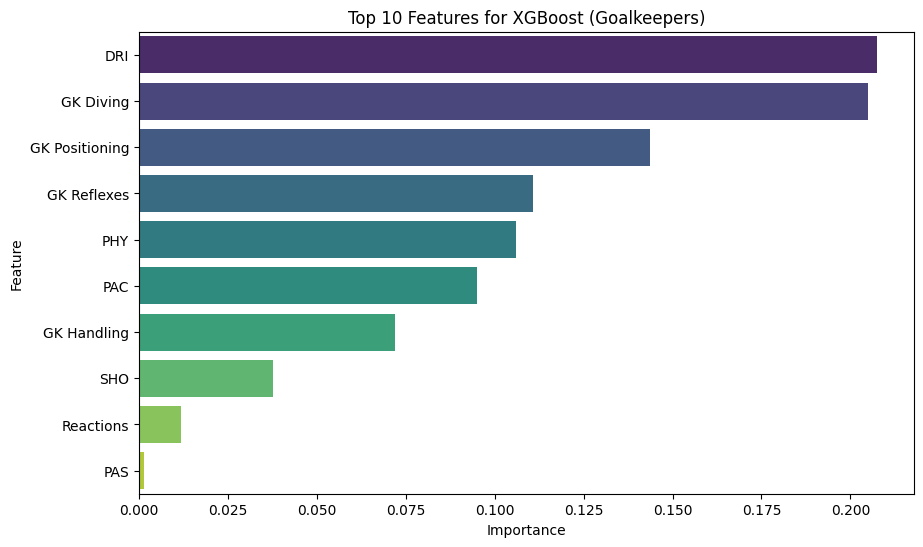

<ipython-input-66-408580d6ca0c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


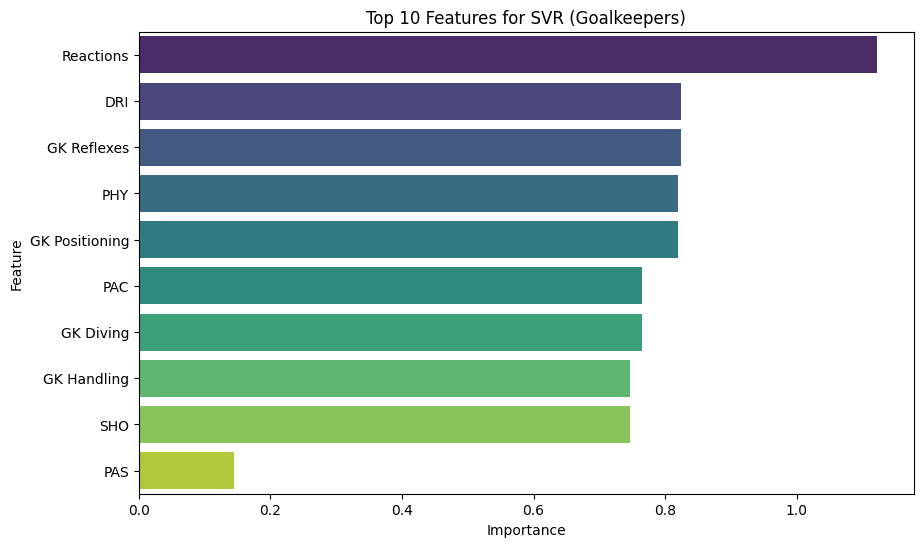

<ipython-input-66-408580d6ca0c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


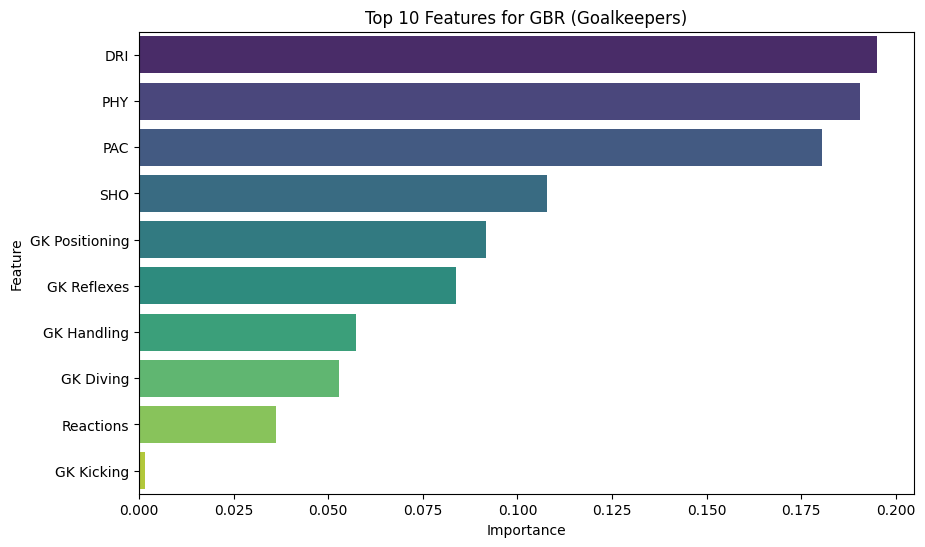

In [ ]:
# Function to plot top 10 features for a given model
def plot_top_10_features(model, feature_names, model_name):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # Flatten the coefficients for SVR (since coef_ is 2D even for single target)
        importances = np.abs(model.coef_).flatten()
    else:
        print(f"Model {model_name} does not support feature importance extraction.")
        return

    # Create a DataFrame for feature importances
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

    # Sort by importance and get the top 10 features
    top_10_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

    # Plot the top 10 features
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
    plt.title(f'Top 10 Features for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Get feature names
feature_names = X_train_ovr.columns

# Plot top 10 features for each model
plot_top_10_features(best_rf_ovr_players, feature_names, 'Random Forest (Players)')
plot_top_10_features(best_xgb_ovr_players, feature_names, 'XGBoost (Players)')
plot_top_10_features(best_svr_ovr_players, feature_names, 'SVR (Players)')
plot_top_10_features(best_gbr_ovr_players, feature_names, 'GBR (Players)')

# For goalkeepers
gk_feature_names = X_train_gk.columns

plot_top_10_features(best_rf_ovr_gk, gk_feature_names, 'Random Forest (Goalkeepers)')
plot_top_10_features(best_xgb_ovr_gk, gk_feature_names, 'XGBoost (Goalkeepers)')
plot_top_10_features(best_svr_ovr_gk, gk_feature_names, 'SVR (Goalkeepers)')
plot_top_10_features(best_gbr_ovr_gk, gk_feature_names, 'GBR (Goalkeepers)')

In [ ]:
from tabulate import tabulate

# Function to calculate train vs. test scores and return them as a row for the table
def get_train_test_scores(model, X_train, y_train, X_test, y_test, model_name):
    # Predict on training and test sets
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² scores for train and test sets
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Calculate MSE scores for train and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Return the scores as a row for the table
    return [model_name, train_r2, test_r2, train_mse, test_mse]

# Initialize an empty list to store table rows
table_data = []

# Add rows for each model (Players)
table_data.append(get_train_test_scores(best_rf_ovr_players, X_train_ovr, y_train_ovr, X_test_ovr, y_test_ovr, 'Random Forest (Players)'))
table_data.append(get_train_test_scores(best_xgb_ovr_players, X_train_ovr, y_train_ovr, X_test_ovr, y_test_ovr, 'XGBoost (Players)'))
table_data.append(get_train_test_scores(best_svr_ovr_players, X_train_ovr, y_train_ovr, X_test_ovr, y_test_ovr, 'SVR (Players)'))
table_data.append(get_train_test_scores(best_gbr_ovr_players, X_train_ovr, y_train_ovr, X_test_ovr, y_test_ovr, 'GBR (Players)'))

# Add rows for each model (Goalkeepers)
table_data.append(get_train_test_scores(best_rf_ovr_gk, X_train_gk, y_train_gk, X_test_gk, y_test_gk, 'Random Forest (Goalkeepers)'))
table_data.append(get_train_test_scores(best_xgb_ovr_gk, X_train_gk, y_train_gk, X_test_gk, y_test_gk, 'XGBoost (Goalkeepers)'))
table_data.append(get_train_test_scores(best_svr_ovr_gk, X_train_gk, y_train_gk, X_test_gk, y_test_gk, 'SVR (Goalkeepers)'))
table_data.append(get_train_test_scores(best_gbr_ovr_gk, X_train_gk, y_train_gk, X_test_gk, y_test_gk, 'GBR (Goalkeepers)'))

# Define table headers
headers = ["Model", "Train R²", "Test R²", "Train MSE", "Test MSE"]

# Print the table
print(tabulate(table_data, headers=headers, tablefmt="grid", floatfmt=".4f"))

+-----------------------------+------------+-----------+-------------+------------+
| Model                       |   Train R² |   Test R² |   Train MSE |   Test MSE |
+=============================+============+===========+=============+============+
| Random Forest (Players)     |     0.9955 |    0.9780 |      0.1999 |     0.9906 |
+-----------------------------+------------+-----------+-------------+------------+
| XGBoost (Players)           |     0.9694 |    0.9653 |      1.3495 |     1.5570 |
+-----------------------------+------------+-----------+-------------+------------+
| SVR (Players)               |     0.9965 |    0.9860 |      0.1536 |     0.6294 |
+-----------------------------+------------+-----------+-------------+------------+
| GBR (Players)               |     0.9888 |    0.9808 |      0.4953 |     0.8608 |
+-----------------------------+------------+-----------+-------------+------------+
| Random Forest (Goalkeepers) |     0.9979 |    0.9912 |      0.1167 |     0